<a href="https://colab.research.google.com/github/edilmita/edilmita/blob/main/Assingment_3_3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

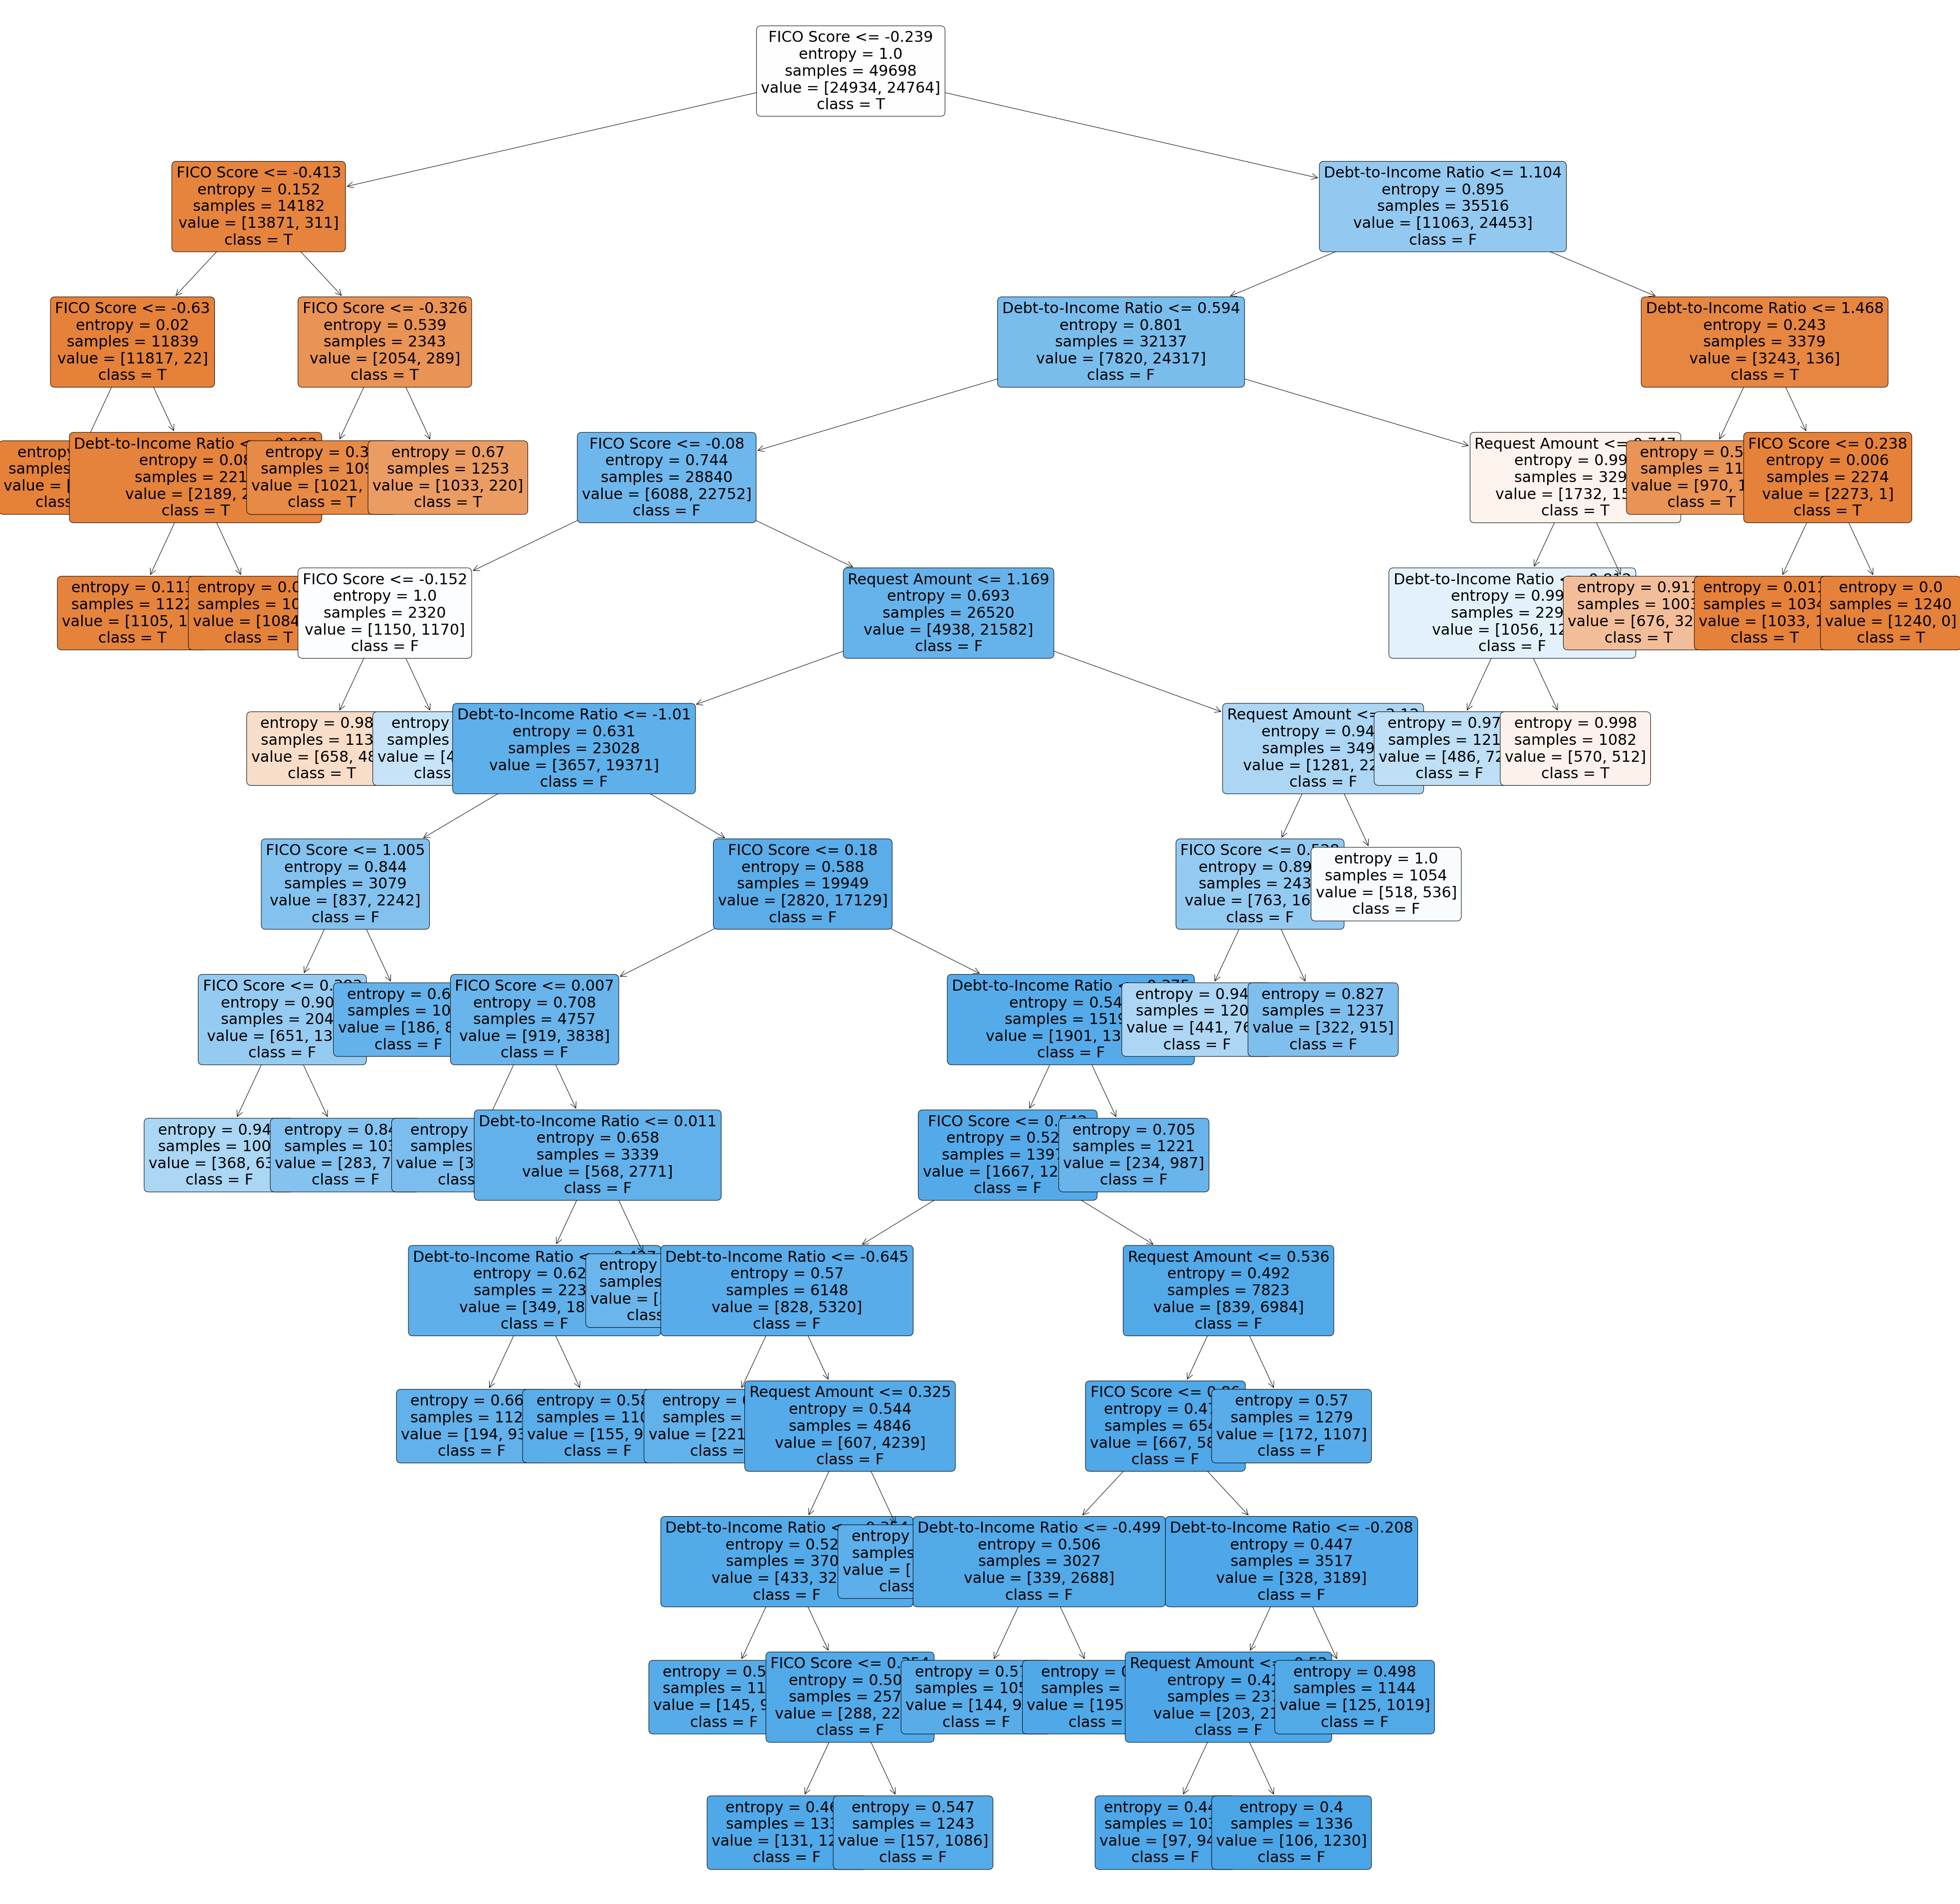

In [ ]:
#@title
#!/usr/bin/env python
# coding: utf-8

# In[1]:


# import library
import pandas as pd
import numpy as np


# In[2]:


# read the dataset
df_train = pd.read_csv('/content/Loans_Training.csv')
df_test = pd.read_csv('/content/Loans_Test.csv')


# In[3]:


df_train.head(5) # display top 5 rows of training data


# In[4]:


df_test.head(5) # display top 5 rows of test data


# In[5]:


# convert T and F of Approval to 1 and 0

df_train['Approval'] = np.where(df_train['Approval']=='F',0,1)
df_test['Approval'] = np.where(df_test['Approval']=='F',0,1)


# In[6]:


df_train # display the training data


# In[7]:


df_test # display the test data


# In[8]:


# creating the x and y for training data
X_train = df_train.iloc[:, [1, 2, 3]].values
y_train = df_train.iloc[:, 0].values

# creating the x and y for test data
X_test = df_test.iloc[:, [1, 2, 3]].values
y_test = df_test.iloc[:, 0].values


# In[9]:


# standardizing the training and test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# # CART Model

# In[10]:


# build the Decision Tree classifier model
# criterion = 'gini' for CART Model

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0 , min_samples_leaf=1000)
classifier.fit(X_train, y_train)


# In[11]:


from sklearn import tree
import matplotlib.pyplot as plt


# In[12]:


# predicting on training data
y_train_pred = classifier.predict(X_train)


# In[13]:


from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred) # accuracy on training data


# In[14]:


# draw decision Tree
# adjust figsize and fontsize for better visualization of Decision Tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (70,70))
a=tree.plot_tree(classifier,feature_names = ['Debt-to-Income Ratio', 'FICO Score', 'Request Amount',
       'Interest'], 
               class_names=['T','F'],
               filled = True,rounded=True,fontsize=30)
plt.show()


# # Q 3

# # C5.0 Model

# In[15]:


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# criterion = 'entropy' is used for c5.0 model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0 , min_samples_leaf=1000)
classifier.fit(X_train, y_train)


# In[16]:


# prediction on training data
y_train_pred = classifier.predict(X_train)


# In[17]:


from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred) # accuracy on training data


# In[18]:


# draw decision Tree
# adjust figsize and fontsize for better visualization of Decision Tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (70,70))
a=tree.plot_tree(classifier,feature_names = ['Debt-to-Income Ratio', 'FICO Score', 'Request Amount',
       'Interest'], 
               class_names=['T','F'],
               filled = True,rounded=True,fontsize=30)
plt.show()


# - 1st split is on the basis of FICO Score
# - 2nd split is on the basis of Debt-to-Income Ratio
# - and so on, as it is visible in the above tree

# # Q.4

# - Similarities: FICO Score acts as a 1st split for both the Model
# - Differences: criterion = 'entropy' is used for C5.0 Model i.e. it is based on information gain, whereas criterion = 'gini' is used for CART Model i.e. Gini impurity
# - Accuracy of both the model is also different on training data

# # Q.5

# In[19]:


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# build a model
classifier_test = DecisionTreeClassifier(criterion = 'entropy', random_state = 0 , min_samples_leaf=1000)
classifier_test.fit(X_test, y_test)


# In[20]:


# draw decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (70,70))
a=tree.plot_tree(classifier_test,feature_names = ['Debt-to-Income Ratio', 'FICO Score', 'Request Amount',
       'Interest'], 
               class_names=['T','F'],
               filled = True,rounded=True,fontsize=30)
plt.show()


# - from the decision tree diagram, it is clear that both the training Tree and Test Tree is different

# In[ ]:










